# ETAPA 1: Preparação e Limpeza dos Dados

## Consulta à Comunidade UFPE sobre o Uso de Inteligência Artificial

---

**Objetivo:** Garantir a qualidade e integridade dos dados antes das análises.

**Procedimentos:**
1. Remover as respostas sem consentimento de participação
2. Excluir a coluna vazia identificada ("Coluna 1")
3. Padronizar categorias de vínculo institucional
4. Verificar e tratar valores ausentes (missing data)
5. Criar variável derivada "Vinculo_Padronizado"

**Produto:** Base de dados tratada com N = 2.164 registros válidos.

**Critério de Validação:** Relatório de limpeza documentando todas as transformações realizadas.

## 1. Configuração Inicial

In [20]:
!pip install -q pandas numpy openpyxl matplotlib

In [2]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurações de exibição
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', None)

print("Bibliotecas carregadas com sucesso!")
print(f"Pandas versão: {pd.__version__}")

Bibliotecas carregadas com sucesso!
Pandas versão: 2.3.3


In [3]:
# ============================================================================
# CONFIGURAÇÃO: Altere o caminho do arquivo conforme necessário
# ============================================================================

ARQUIVO_ENTRADA = "data/Consulta_a__Comunidade_UFPE_sobre_o_Uso_de_Intelige_ncia_Artificial__respostas_.xlsx"
ARQUIVO_SAIDA = "data/dados_limpos_etapa1.xlsx"
ARQUIVO_SAIDA_CSV = "data/dados_limpos_etapa1.csv"

## 2. Carregamento dos Dados Originais

In [6]:
# Carregar dados originais
df_original = pd.read_excel(f"{ARQUIVO_ENTRADA}")

print("=" * 70)
print("DADOS ORIGINAIS")
print("=" * 70)
print(f"Total de registros: {len(df_original)}")
print(f"Total de colunas: {len(df_original.columns)}")
print(f"\nColunas disponíveis:")
for i, col in enumerate(df_original.columns, 1):
    print(f"  {i:2}. {col[:80]}{'...' if len(col) > 80 else ''}")

DADOS ORIGINAIS
Total de registros: 2182
Total de colunas: 24

Colunas disponíveis:
   1. Carimbo de data/hora
   2. Você leu as informações acima e concorda em participar voluntariamente desta con...
   3. Vínculo com a UFPE
   4. Centro, Unidade Acadêmica ou Unidade Gestora
   5. Curso (para discentes)
   6. Você já utilizou alguma ferramenta de IA (como ChatGPT, Copilot, Gemini, Claude,...
   7. Em quais contextos você utiliza ou pretende utilizar ferramentas de IA?
   8. Quais benefícios você percebe no uso da IA na UFPE?
   9. Quais riscos ou preocupações você identifica no uso da IA na universidade?
  10. O uso que você faz (ou faria) de ferramentas de IA é predominantemente:
  11. Avalie as afirmações abaixo de acordo com seu grau de concordância. [A inteligên...
  12. Avalie as afirmações abaixo de acordo com seu grau de concordância. [O uso ético...
  13. Avalie as afirmações abaixo de acordo com seu grau de concordância. [A UFPE deve...
  14. Avalie as afirmações abaixo de ac

In [7]:
# Visualizar primeiras linhas
df_original.head(3)

,Carimbo de data/hora,"Você leu as informações acima e concorda em participar voluntariamente desta consulta pública, ciente de que suas respostas são anônimas?",Vínculo com a UFPE,"Centro, Unidade Acadêmica ou Unidade Gestora",Curso (para discentes),"Você já utilizou alguma ferramenta de IA (como ChatGPT, Copilot, Gemini, Claude, Perplexity etc.)?",Em quais contextos você utiliza ou pretende utilizar ferramentas de IA?,Quais benefícios você percebe no uso da IA na UFPE?,Quais riscos ou preocupações você identifica no uso da IA na universidade?,O uso que você faz (ou faria) de ferramentas de IA é predominantemente:,"Avalie as afirmações abaixo de acordo com seu grau de concordância. [A inteligência artificial já não é mais uma opção, é uma realidade com a qual precisamos aprender a lidar.]",Avalie as afirmações abaixo de acordo com seu grau de concordância. [O uso ético e responsável da inteligência artificial requer diretrizes e normativas claras.],Avalie as afirmações abaixo de acordo com seu grau de concordância. [A UFPE deve oferecer diretrizes sobre o uso de IA em trabalhos e avaliações de atividades dos discentes.],"Avalie as afirmações abaixo de acordo com seu grau de concordância. [O uso de IA deve ser incentivado como ferramenta de apoio, desde que usado de forma responsável.]","Avalie as afirmações abaixo de acordo com seu grau de concordância. [A universidade deve promover mais debates, orientações de uso e espaços de reflexão sobre os impactos da IA na sociedade.]","Na sua percepção, como a IA pode impactar a produção autoral?","Na sua percepção, como a IA pode impactar a integridade acadêmica?","Que medidas a UFPE deveria adotar para garantir o uso ético, transparente e responsável da IA?",Quais temas devem ser priorizados no Plano Institucional de IA da UFPE?,Como a UFPE deve estruturar sua governança em relação à IA?,Você se sente preparado(a) para usar ferramentas de IA de forma ética e eficaz?,Que tipos de formação ou de suporte institucional você considera mais importantes?,Deixe aqui sugestões ou comentários finais.,Coluna 1
0,2025-11-11 00:21:21.013,"Sim, concordo em participar",Docente,CCS - Centro de Ciências da Saúde,NaN,"Sim, frequentemente","Elaboração de textos, resumos ou traduções, Apoio à pesquisa científica, Ensino e aprendizagem, ...",Otimização do trabalho e qualificação das realizações. Otimização de tempo das tarefas e ganho d...,"Utilização incompetente da ferramenta. Subordinação às suas conclusões, por baixa capacidade crí...",Pago (assinaturas ou créditos),Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Na ampliação da capacidade de trabalho pela realização de tarefas anteriormente incapazes de ser...,"Penso que a criação não autoral de conteúdos, sem a devida crítica, se tornará cada vez mais fre...",Programas de educação continuada sobre a potencialização do uso da IA; sobre os tipos de conduta...,"Uso de IA no ensino e na avaliação, Pesquisa científica com IA, Ética e integridade acadêmica, U...",Criação de uma comissão que dinamize uma política institucional de IA. Criação de conteúdos de a...,Sim,"Oficinas práticas sobre ferramentas de IA, Apoio técnico na elaboração de projetos, Espaços de d...",A UFPE deve pensar e viabilizar a democratização de acesso às melhores ferramentas de IA.,NaN
1,2025-11-11 07:56:42.679,"Sim, concordo em participar",Docente,CCJ - Centro de Ciências Jurídicas,NaN,"Sim, frequentemente","Elaboração de textos, resumos ou traduções, Apoio à pesquisa científica, Ensino e aprendizagem","Facilita estruturar apresentações, questionários para pesquisa, organizar aulas, analisar dados,...","Dependência tecnológica, impacto no trabalho, impacto ambiental, raciocínio",Gratuito (versões abertas) por exemplo versões free,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Motivando não raciocínio inteligente. As pessoas buscam titulação e não aprendizagem. A IA facil...,a I

## 3. Procedimento 1: Remoção de Respostas sem Consentimento

In [8]:
# Identificar coluna de consentimento
col_consentimento = 'Você leu as informações acima e concorda em participar voluntariamente desta consulta pública, ciente de que suas respostas são anônimas?'

# Verificar distribuição do consentimento
print("Distribuição do consentimento:")
print(df_original[col_consentimento].value_counts())

Distribuição do consentimento:
Você leu as informações acima e concorda em participar voluntariamente desta consulta pública, ciente de que suas respostas são anônimas?
Sim, concordo em participar    2164
Não concordo em participar       18
Name: count, dtype: int64


In [9]:
# Filtrar apenas os que consentiram
df = df_original[df_original[col_consentimento] == 'Sim, concordo em participar'].copy()

n_removidos = len(df_original) - len(df)
print(f"Registros sem consentimento removidos: {n_removidos}")
print(f"Registros mantidos: {len(df)}")

Registros sem consentimento removidos: 18
Registros mantidos: 2164


## 4. Procedimento 2: Exclusão de Coluna Vazia

In [10]:
# Identificar colunas completamente vazias
colunas_vazias = df.columns[df.isna().all()].tolist()
print(f"Colunas completamente vazias identificadas: {colunas_vazias}")

# Remover colunas vazias
if colunas_vazias:
    df = df.drop(columns=colunas_vazias)
    print(f"Colunas removidas: {colunas_vazias}")
    
print(f"Total de colunas após remoção: {len(df.columns)}")

Colunas completamente vazias identificadas: ['Coluna 1']
Colunas removidas: ['Coluna 1']
Total de colunas após remoção: 23


## 5. Procedimento 3: Padronização de Vínculos Institucionais

In [11]:
# Identificar coluna de vínculo
col_vinculo = 'Vínculo com a UFPE'

# Remover espaços extras
df[col_vinculo] = df[col_vinculo].str.strip()

# Verificar valores únicos antes da padronização
print(f"Valores únicos ANTES da padronização: {df[col_vinculo].nunique()}")
print("\nDistribuição original:")
print(df[col_vinculo].value_counts())

Valores únicos ANTES da padronização: 26

Distribuição original:
Vínculo com a UFPE
Discente de Graduação                                                         790
Docente                                                                       550
Discente de Pós-Graduação                                                     461
Técnico-administrativo                                                        308
Egresso de Pós-Graduação                                                       22
Egresso de Graduação                                                           13
Pós-doutor do Programa de Pós-graduação em Educação Física.                     1
Professor Visitante                                                             1
Egresso de Pós-Graduação, atualmente peaquisador em um projeto de pesquisa      1
Discente                                                                        1
Docente aposentado.                                                             1
Discente de Pó

In [12]:
# Dicionário de mapeamento para padronização
mapeamento_vinculo = {
    # Discentes de Graduação
    'Discente de Graduação': 'Discente de Graduação',
    'Discente': 'Discente de Graduação',
    'Sou egresso de bach. de Educação Física e atualmente discente de Letras': 'Discente de Graduação',
    
    # Discentes de Pós-Graduação
    'Discente de Pós-Graduação': 'Discente de Pós-Graduação',
    'Discente de Pós-Graduação & Técnico Administrativo': 'Discente de Pós-Graduação',
    'Discente de Pós-Graduação e Técnico-administrativo': 'Discente de Pós-Graduação',
    'Técnico-administrativo e discente da pós-graduação': 'Discente de Pós-Graduação',
    'Técnico-administrativo e discente de pós-graduação': 'Discente de Pós-Graduação',
    'Técnica e Discente de pós graduação': 'Discente de Pós-Graduação',
    'Pós-doutor do Programa de Pós-graduação em Educação Física.': 'Discente de Pós-Graduação',
    'pós-doc': 'Discente de Pós-Graduação',
    
    # Docentes
    'Docente': 'Docente',
    'Docente aposentado.': 'Docente',
    'Docente da pós-graduação': 'Docente',
    'Professor substituto': 'Docente',
    'Professor Visitante': 'Docente',
    'Técnico adm e docente': 'Docente',
    
    # Técnico-administrativo
    'Técnico-administrativo': 'Técnico-administrativo',
    'Técnico em Assuntos Educacionais': 'Técnico-administrativo',
    'Funcionário FADE': 'Técnico-administrativo',
    
    # Egressos
    'Egresso de Graduação': 'Egresso',
    'Egresso de Pós-Graduação': 'Egresso',
    'Egresso': 'Egresso',
    'Recém Graduado': 'Egresso',
    'Ex-discente de graduação e de pós-graduação': 'Egresso',
    'Egresso de Pós-Graduação, atualmente peaquisador em um projeto de pesquisa': 'Egresso'
}

# Criar variável padronizada
df['Vinculo_Padronizado'] = df[col_vinculo].map(mapeamento_vinculo)

print("Mapeamento aplicado com sucesso!")

Mapeamento aplicado com sucesso!


In [13]:
# Verificar se há valores não mapeados
nao_mapeados = df[df['Vinculo_Padronizado'].isna()][col_vinculo].unique()

if len(nao_mapeados) > 0:
    print("⚠️ ATENÇÃO: Valores não mapeados encontrados:")
    for v in nao_mapeados:
        print(f"   - '{v}'")
    print("\nAdicione estes valores ao dicionário de mapeamento acima.")
else:
    print("✓ Todos os valores foram mapeados com sucesso!")

✓ Todos os valores foram mapeados com sucesso!


In [14]:
# Verificar distribuição após padronização
print(f"Valores únicos APÓS padronização: {df['Vinculo_Padronizado'].nunique()}")
print("\nDistribuição padronizada:")

dist_vinculo = df['Vinculo_Padronizado'].value_counts()
for vinculo, count in dist_vinculo.items():
    pct = count / len(df) * 100
    print(f"   • {vinculo}: {count} ({pct:.1f}%)")

print(f"\n   TOTAL: {len(df)} registros")

Valores únicos APÓS padronização: 5

Distribuição padronizada:
   • Discente de Graduação: 792 (36.6%)
   • Docente: 555 (25.6%)
   • Discente de Pós-Graduação: 468 (21.6%)
   • Técnico-administrativo: 310 (14.3%)
   • Egresso: 39 (1.8%)

   TOTAL: 2164 registros


In [ ]:
import matplotlib.pyplot as plt

# Dados da distribuição padronizada da célula anterior
labels = list(distribuicao_padronizada.keys())
sizes = list(distribuicao_padronizada.values())

# Criar gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição Padronizada')
plt.axis('equal')
plt.tight_layout()
plt.show()

## 6. Procedimento 4: Renomeação de Variáveis

In [15]:
# Dicionário de renomeação para nomes mais curtos e padronizados
nomes_curtos = {
    'Carimbo de data/hora': 'Timestamp',
    col_consentimento: 'Consentimento',
    'Vínculo com a UFPE': 'Vinculo_Original',
    'Centro, Unidade Acadêmica ou Unidade Gestora': 'Centro_Unidade',
    'Curso (para discentes)': 'Curso',
    'Você já utilizou alguma ferramenta de IA (como ChatGPT, Copilot, Gemini, Claude, Perplexity etc.)?': 'Frequencia_Uso_IA',
    'Em quais contextos você utiliza ou pretende utilizar ferramentas de IA?': 'Contextos_Uso',
    'Quais benefícios você percebe no uso da IA na UFPE?': 'Beneficios_Percebidos',
    'Quais riscos ou preocupações você identifica no uso da IA na universidade?': 'Riscos_Preocupacoes',
    'O uso que você faz (ou faria) de ferramentas de IA é predominantemente:': 'Tipo_Uso',
    'Avalie as afirmações abaixo de acordo com seu grau de concordância. [A inteligência artificial já não é mais uma opção, é uma realidade com a qual precisamos aprender a lidar.]': 'Likert_IA_Realidade',
    'Avalie as afirmações abaixo de acordo com seu grau de concordância. [O uso ético e responsável da inteligência artificial requer diretrizes e normativas claras.]': 'Likert_Diretrizes_Eticas',
    'Avalie as afirmações abaixo de acordo com seu grau de concordância. [A UFPE deve oferecer diretrizes sobre o uso de IA em trabalhos e avaliações de atividades dos discentes.]': 'Likert_Diretrizes_Avaliacoes',
    'Avalie as afirmações abaixo de acordo com seu grau de concordância. [O uso de IA deve ser incentivado como ferramenta de apoio, desde que usado de forma responsável.]': 'Likert_Incentivo_IA',
    'Avalie as afirmações abaixo de acordo com seu grau de concordância. [A universidade deve promover mais debates, orientações de uso e espaços de reflexão sobre os impactos da IA na sociedade.]': 'Likert_Debates_Impactos',
    'Na sua percepção, como a IA pode impactar a produção autoral?': 'Impacto_Producao_Autoral',
    'Na sua percepção, como a IA pode impactar a integridade acadêmica?': 'Impacto_Integridade_Academica',
    'Que medidas a UFPE deveria adotar para garantir o uso ético, transparente e responsável da IA?': 'Medidas_Uso_Etico',
    'Quais temas devem ser priorizados no Plano Institucional de IA da UFPE?': 'Temas_Prioritarios',
    'Como a UFPE deve estruturar sua governança em relação à IA?': 'Estrutura_Governanca',
    'Você se sente preparado(a) para usar ferramentas de IA de forma ética e eficaz?': 'Preparacao_Uso_Etico',
    'Que tipos de formação ou de suporte institucional você considera mais importantes?': 'Tipos_Formacao',
    'Deixe aqui sugestões ou comentários finais.': 'Comentarios_Finais'
}

# Aplicar renomeação
df = df.rename(columns=nomes_curtos)

print("Colunas renomeadas:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2}. {col}")

Colunas renomeadas:
   1. Timestamp
   2. Consentimento
   3. Vinculo_Original
   4. Centro_Unidade
   5. Curso
   6. Frequencia_Uso_IA
   7. Contextos_Uso
   8. Beneficios_Percebidos
   9. Riscos_Preocupacoes
  10. Tipo_Uso
  11. Likert_IA_Realidade
  12. Likert_Diretrizes_Eticas
  13. Likert_Diretrizes_Avaliacoes
  14. Likert_Incentivo_IA
  15. Likert_Debates_Impactos
  16. Impacto_Producao_Autoral
  17. Impacto_Integridade_Academica
  18. Medidas_Uso_Etico
  19. Temas_Prioritarios
  20. Estrutura_Governanca
  21. Preparacao_Uso_Etico
  22. Tipos_Formacao
  23. Comentarios_Finais
  24. Vinculo_Padronizado


## 7. Procedimento 5: Análise de Valores Ausentes (Missing Data)

In [18]:
# Análise de missing values
print("=" * 70)
print("ANÁLISE DE VALORES AUSENTES")
print("=" * 70)

missing_report = []
for col in df.columns:
    n_missing = df[col].isna().sum()
    pct_missing = (n_missing / len(df)) * 100
    missing_report.append({
        'Variável': col,
        'N_Missing': n_missing,
        'Pct_Missing': round(pct_missing, 1)
    })

# Criar DataFrame do relatório
df_missing = pd.DataFrame(missing_report)
df_missing = df_missing.sort_values('N_Missing', ascending=False)

# Exibir apenas variáveis com missing
print("\nVariáveis com valores ausentes:")
print("-" * 50)
df_com_missing = df_missing[df_missing['N_Missing'] > 0]
print(df_com_missing.to_string(index=False))

print(f"\nVariáveis sem valores ausentes: {len(df_missing[df_missing['N_Missing'] == 0])}")

ANÁLISE DE VALORES AUSENTES

Variáveis com valores ausentes:
--------------------------------------------------
                     Variável  N_Missing  Pct_Missing
           Comentarios_Finais       1519         70.2
                        Curso        777         35.9
         Estrutura_Governanca        479         22.1
     Impacto_Producao_Autoral        293         13.5
Impacto_Integridade_Academica        286         13.2
            Medidas_Uso_Etico        278         12.8
        Beneficios_Percebidos        124          5.7
          Riscos_Preocupacoes        106          4.9

Variáveis sem valores ausentes: 16


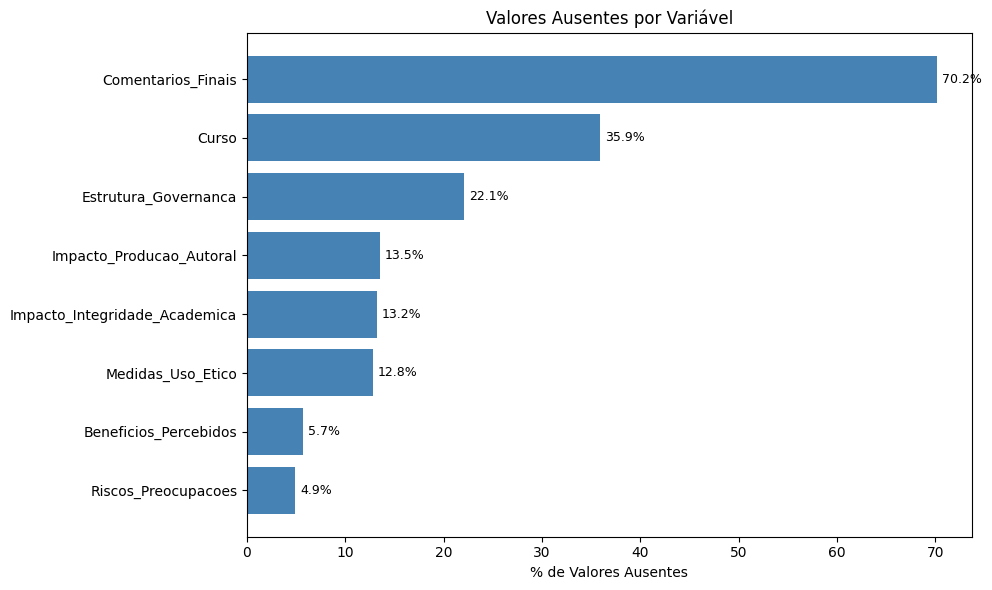


Gráfico salvo como: missing_values_etapa1.png


In [21]:
# Visualização dos missing values
import matplotlib.pyplot as plt

# Filtrar apenas variáveis com missing > 0
df_plot = df_com_missing[df_com_missing['Pct_Missing'] > 0].copy()

if len(df_plot) > 0:
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.barh(df_plot['Variável'], df_plot['Pct_Missing'], color='steelblue')
    ax.set_xlabel('% de Valores Ausentes')
    ax.set_title('Valores Ausentes por Variável')
    ax.invert_yaxis()
    
    # Adicionar labels nas barras
    for bar, pct in zip(bars, df_plot['Pct_Missing']):
        ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{pct}%', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.savefig('missing_values_etapa1.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("\nGráfico salvo como: missing_values_etapa1.png")
else:
    print("Nenhuma variável com valores ausentes para plotar.")

## 8. Resumo da Etapa 1

In [22]:
print("=" * 70)
print("RESUMO DA ETAPA 1 - LIMPEZA CONCLUÍDA")
print("=" * 70)

print(f"""
📋 TRANSFORMAÇÕES REALIZADAS:

   1. Remoção de registros sem consentimento
      • Registros removidos: {n_removidos}
      • Registros mantidos: {len(df)}

   2. Exclusão de coluna vazia
      • Coluna removida: 'Coluna 1'
      • Total de colunas: {len(df.columns)}

   3. Padronização de vínculos institucionais
      • Categorias originais: 26
      • Categorias padronizadas: {df['Vinculo_Padronizado'].nunique()}
""")

for vinculo, count in df['Vinculo_Padronizado'].value_counts().items():
    pct = count / len(df) * 100
    print(f"        - {vinculo}: {count} ({pct:.1f}%)")

print(f"""
   4. Renomeação de colunas para facilitar análise
      • {len(df.columns)} colunas renomeadas com nomes curtos

   5. Documentação de valores ausentes
      • Variáveis com missing identificadas e documentadas

📁 BASE DE DADOS FINAL:
   • Registros válidos: {len(df)}
   • Variáveis: {len(df.columns)}
""")

RESUMO DA ETAPA 1 - LIMPEZA CONCLUÍDA

📋 TRANSFORMAÇÕES REALIZADAS:

   1. Remoção de registros sem consentimento
      • Registros removidos: 18
      • Registros mantidos: 2164

   2. Exclusão de coluna vazia
      • Coluna removida: 'Coluna 1'
      • Total de colunas: 24

   3. Padronização de vínculos institucionais
      • Categorias originais: 26
      • Categorias padronizadas: 5

        - Discente de Graduação: 792 (36.6%)
        - Docente: 555 (25.6%)
        - Discente de Pós-Graduação: 468 (21.6%)
        - Técnico-administrativo: 310 (14.3%)
        - Egresso: 39 (1.8%)

   4. Renomeação de colunas para facilitar análise
      • 24 colunas renomeadas com nomes curtos

   5. Documentação de valores ausentes
      • Variáveis com missing identificadas e documentadas

📁 BASE DE DADOS FINAL:
   • Registros válidos: 2164
   • Variáveis: 24



## 9. Salvar Base de Dados Limpa

In [23]:
# Salvar em Excel
df.to_excel(ARQUIVO_SAIDA, index=False)
print(f"✅ Base de dados limpa salva em: {ARQUIVO_SAIDA}")

# Salvar em CSV (opcional)
df.to_csv(ARQUIVO_SAIDA_CSV, index=False)
print(f"✅ Base de dados limpa salva em: {ARQUIVO_SAIDA_CSV}")

✅ Base de dados limpa salva em: data/dados_limpos_etapa1.xlsx
✅ Base de dados limpa salva em: data/dados_limpos_etapa1.csv


In [24]:
# Visualizar amostra da base final
print("Amostra da base de dados limpa:")
df.head()

Amostra da base de dados limpa:


,Timestamp,Consentimento,Vinculo_Original,Centro_Unidade,Curso,Frequencia_Uso_IA,Contextos_Uso,Beneficios_Percebidos,Riscos_Preocupacoes,Tipo_Uso,Likert_IA_Realidade,Likert_Diretrizes_Eticas,Likert_Diretrizes_Avaliacoes,Likert_Incentivo_IA,Likert_Debates_Impactos,Impacto_Producao_Autoral,Impacto_Integridade_Academica,Medidas_Uso_Etico,Temas_Prioritarios,Estrutura_Governanca,Preparacao_Uso_Etico,Tipos_Formacao,Comentarios_Finais,Vinculo_Padronizado
0,2025-11-11 00:21:21.013,"Sim, concordo em participar",Docente,CCS - Centro de Ciências da Saúde,NaN,"Sim, frequentemente","Elaboração de textos, resumos ou traduções, Apoio à pesquisa científica, Ensino e aprendizagem, ...",Otimização do trabalho e qualificação das realizações. Otimização de tempo das tarefas e ganho d...,"Utilização incompetente da ferramenta. Subordinação às suas conclusões, por baixa capacidade crí...",Pago (assinaturas ou créditos),Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Na ampliação da capacidade de trabalho pela realização de tarefas anteriormente incapazes de ser...,"Penso que a criação não autoral de conteúdos, sem a devida crítica, se tornará cada vez mais fre...",Programas de educação continuada sobre a potencialização do uso da IA; sobre os tipos de conduta...,"Uso de IA no ensino e na avaliação, Pesquisa científica com IA, Ética e integridade acadêmica, U...",Criação de uma comissão que dinamize uma política institucional de IA. Criação de conteúdos de a...,Sim,"Oficinas práticas sobre ferramentas de IA, Apoio técnico na elaboração de projetos, Espaços de d...",A UFPE deve pensar e viabilizar a democratização de acesso às melhores ferramentas de IA.,Docente
1,2025-11-11 07:56:42.679,"Sim, concordo em participar",Docente,CCJ - Centro de Ciências Jurídicas,NaN,"Sim, frequentemente","Elaboração de textos, resumos ou traduções, Apoio à pesquisa científica, Ensino e aprendizagem","Facilita estruturar apresentações, questionários para pesquisa, organizar aulas, analisar dados,...","Dependência tecnológica, impacto no trabalho, impacto ambiental, raciocínio",Gratuito (versões abertas) por exemplo versões free,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Motivando não raciocínio inteligente. As pessoas buscam titulação e não aprendizagem. A IA facil...,a IA exige repensar a avaliação. Se o docente reduz a importância de seu ensino a reproduzir o q...,Construir uma massa crítica sobre o tema na UFPE reduzindo a desinformação. Promover cursos de f...,"Uso de IA no ensino e na avaliação, Pesquisa científica com IA, Ética e integridade acadêmica, P...","Assumindo o protagonismo da desmistificaçao do uso de IA, fomentando debate amplo e aberto de to...",Sim,"Oficinas práticas sobre ferramentas de IA, Cursos sobre ética e regulamentação, Guias e tutoriai...",NaN,Docente
2,2025-11-11 08:55:25.101,"Sim, concordo em participar",Docente,CE - Centro de Educação,NaN,"Sim, ocasionalmente","Elaboração de textos, resumos ou traduções, Apoio à pesquisa científica, Ensino e aprendizagem, ...",Apoio no desenvolvimento de atividades acadêmicas,Desconhecimento do uso adequado o que gera resultados negativos na resposta,Ambos,Concordo,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,O uso irresponsável Da IA na produção de material pode gerar produtos não confiáveis.,Desinformação e evidencias falsas,Criar politica interna,"Uso de IA no ensino e na avaliação, Pesquisa científica com IA, Ética e integridade acadêmica, P...",Observatório de IA,Parcialmente,"Oficinas práticas sobre ferramentas de IA, Cursos sobre ética e regulamentação, Guias e tutoriai...",NaN,Docente
3,2025-11-11 11:10:49.503,"Sim, concordo em participar",Docente,CCSA - Centro de Ciências Sociais Aplicadas,Administração,"Sim, ocasionalmente",Apoio à pesquisa científica,Aumento da produtividade e pesquisa de artigos.,Plágio e atrofia cognitiva.,Gratuito (versões abertas) po

## 10. Geração do Relatório de Limpeza

In [25]:
# Gerar relatório de limpeza em Markdown
relatorio = f"""# RELATÓRIO DE LIMPEZA DE DADOS
## Etapa 1 — Consulta à Comunidade UFPE sobre o Uso de IA

**Data de execução:** {datetime.now().strftime("%d/%m/%Y às %H:%M")}

---

## 1. DADOS ORIGINAIS

| Métrica | Valor |
|---------|-------|
| Total de registros | {len(df_original)} |
| Total de colunas | {len(df_original.columns)} |

---

## 2. TRANSFORMAÇÕES REALIZADAS

### 2.1 Remoção de registros sem consentimento

| Descrição | Quantidade |
|-----------|------------|
| Registros sem consentimento removidos | {n_removidos} |
| Registros mantidos | {len(df)} |
| Taxa de exclusão | {n_removidos/len(df_original)*100:.1f}% |

### 2.2 Exclusão de coluna vazia

| Coluna removida | Motivo |
|-----------------|--------|
| "Coluna 1" | Completamente vazia (100% missing) |

### 2.3 Padronização de vínculos institucionais

**De 26 categorias originais para {df['Vinculo_Padronizado'].nunique()} categorias padronizadas:**

| Categoria Padronizada | Registros | % |
|-----------------------|-----------|---|
"""

for vinculo, count in df['Vinculo_Padronizado'].value_counts().items():
    pct = count / len(df) * 100
    relatorio += f"| {vinculo} | {count} | {pct:.1f}% |\n"

relatorio += f"""| **TOTAL** | **{len(df)}** | **100%** |

---

## 3. ANÁLISE DE VALORES AUSENTES

| Variável | N Missing | % Missing |
|----------|-----------|----------|
"""

for _, row in df_com_missing.iterrows():
    relatorio += f"| {row['Variável']} | {row['N_Missing']} | {row['Pct_Missing']}% |\n"

relatorio += f"""
**Variáveis completas (0% missing):** {len(df_missing[df_missing['N_Missing'] == 0])} variáveis

---

## 4. BASE DE DADOS FINAL

| Métrica | Valor |
|---------|-------|
| Total de registros válidos | {len(df)} |
| Total de variáveis | {len(df.columns)} |
| Arquivo gerado | {ARQUIVO_SAIDA} |

---

## 5. VALIDAÇÃO

- [x] Todos os {len(df)} registros possuem consentimento válido
- [x] Coluna vazia removida
- [x] 100% dos vínculos mapeados para categorias padronizadas
- [x] Nomes de variáveis padronizados
- [x] Missing values documentados

---

*Relatório gerado automaticamente em {datetime.now().strftime("%d/%m/%Y às %H:%M")}*
"""

# Salvar relatório
with open("relatorio_limpeza_etapa1.md", "w", encoding='utf-8') as f:
    f.write(relatorio)

print("✅ Relatório de limpeza salvo em: relatorio_limpeza_etapa1.md")
print("\n" + "=" * 70)
print("ETAPA 1 CONCLUÍDA COM SUCESSO!")
print("=" * 70)

✅ Relatório de limpeza salvo em: relatorio_limpeza_etapa1.md

ETAPA 1 CONCLUÍDA COM SUCESSO!


---

## Arquivos Gerados

| Arquivo | Descrição |
|---------|----------|
| `dados_limpos_etapa1.xlsx` | Base de dados tratada |
| `dados_limpos_etapa1.csv` | Base de dados tratada (CSV) |
| `relatorio_limpeza_etapa1.md` | Relatório documentando transformações |
| `missing_values_etapa1.png` | Gráfico de valores ausentes |

---

**Próxima etapa:** Etapa 2 - Análise do Perfil dos Respondentes